In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


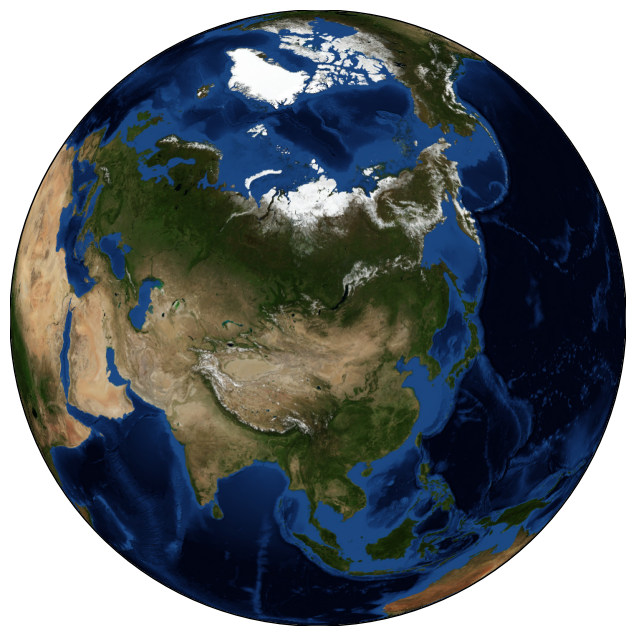

In [5]:
plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=100)
m.bluemarble(scale=0.5);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


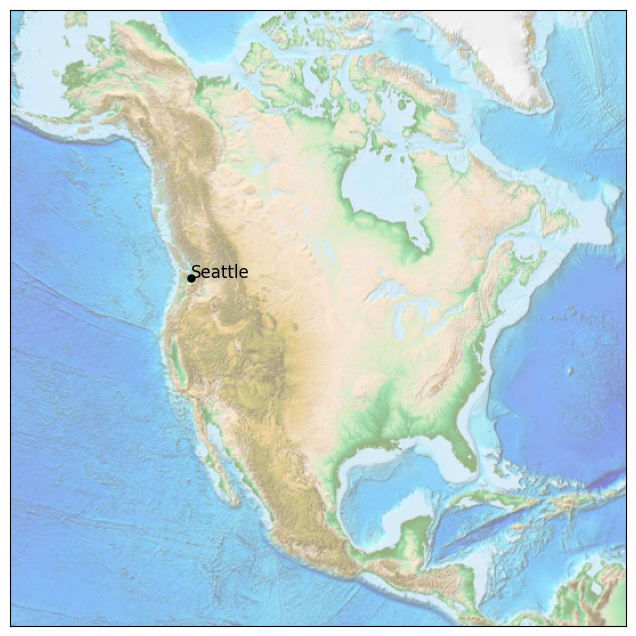

In [9]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            width=8E6, height=8E6,
            lat_0=45, lon_0=-100,)
m.etopo(scale=0.5, alpha=0.5)

#Map (long and lat) to (x, y) for plotting
x, y =m(-122.3, 47.6)
plt.plot(x, y,'ok', markersize=5)
plt.text(x, y, 'Seattle', fontsize=12);

In [10]:
#Defining a convenience routine to draw our world map along with the longitude and latitude lines:
from itertools import chain

def draw_map(m, scale=0.2):
    # draw a shaded relief image
    m.shadedrelief(scale=scale)

    #lats and longs are returned as dictionary
    lats = m.drawparallels(np.linspace(-90,90, 13))
    lons = m.drawmeridians(np.linspace(-180,180,13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)

    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

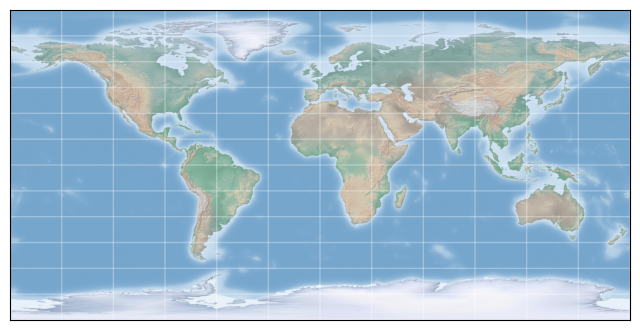

In [13]:
# Cylindrical projections
fig =plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='cyl', resolution=None,
            #lower-left corner(llcrnr) & upper-right corner(urcrnr)
           llcrnrlat=-90, urcrnrlat=90,
           llcrnrlon=-180, urcrnrlon=180, )
draw_map(m)

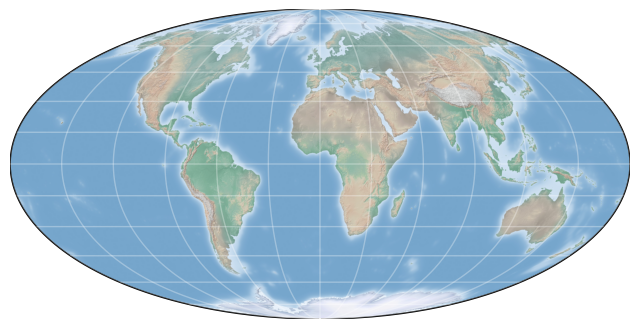

In [15]:
#Pseuso-cylindrical projections
fig = plt.figure(figsize=(8,6), edgecolor='w')
m = Basemap(projection = 'moll', resolution=None,
           lat_0=0,lon_0=0)
draw_map(m)

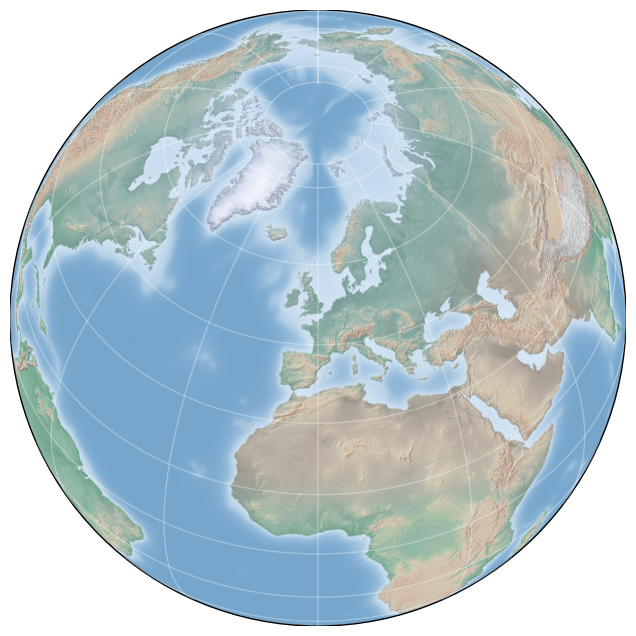

In [16]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None,
           lat_0=50, lon_0=0)
draw_map(m);

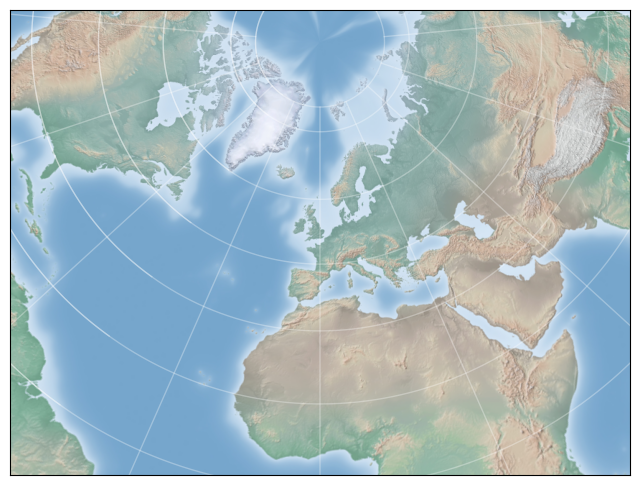

In [18]:
fig = plt.figure(figsize=(8,8))
m = Basemap(projection='lcc', resolution=None,
           lon_0=0, lat_0=50, lon_1=45, lat_2=55,
           width=1.6E7, height=1.2E7)
draw_map(m)

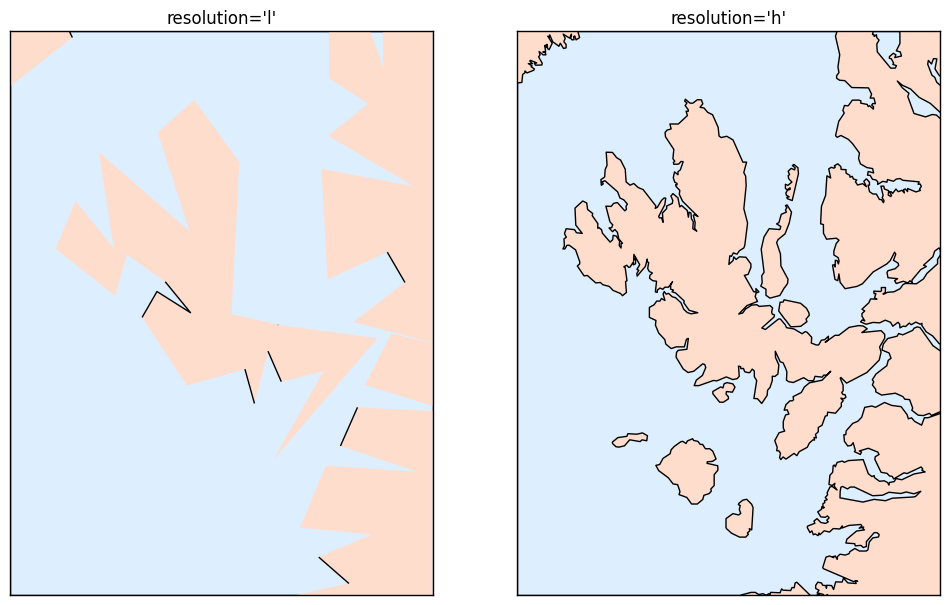

In [23]:
#Draw land/sea boundaries
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
for i, res in enumerate(['l', 'h']):
    m = Basemap(projection='gnom', lat_0=57.3, lon_0=-6.2,
             width=90000, height=120000, ax=ax[i], resolution=res)
    m.fillcontinents(color='#FFDDCC', lake_color='#DDEEFF')
    m.drawmapboundary(fill_color='#DDEEFF')
    m.drawcoastlines()
    ax[i].set_title("resolution='{0}'".format(res))

In [25]:
# Example California Cities 
import pandas as pd
cities = pd.read_csv('california_cities.csv')

In [26]:
cities.head()

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01


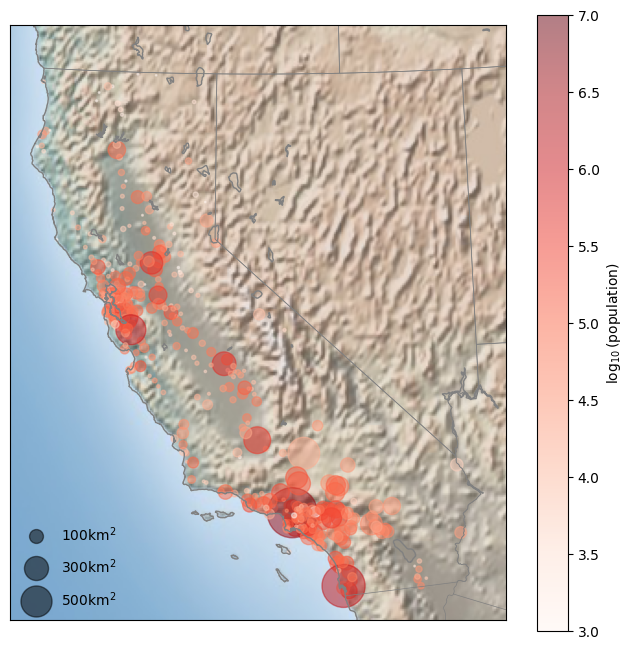

In [29]:
#extract the data we ara interested in
lat = cities['latd'].values
lon = cities['longd'].values
population = cities['population_total'].values
area = cities['area_total_km2'].values

# set up the map projection, scatter the data, create a colorbar and a legend
# draw the map background
fig = plt.figure(figsize=(8, 8))
m= Basemap(projection='lcc', resolution='h',
          lat_0=37.5, lon_0=-119,
          width=1E6, height=1.2E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# scatter city data, with color representing population and size representing area
m.scatter(lon, lat, latlon=True,
         c=np.log10(population), s=area,
         cmap='Reds', alpha=0.5)

#create colorbar and legend
plt.colorbar(label=r'$\log_{10}({\rm population})$')
plt.clim(3, 7)

#make legend with dummy points
for a in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.5, s=a,
               label=str(a) + 'km$^2$')
    plt.legend(scatterpoints=1, frameon=False,
              labelspacing=1, loc='lower left');